# Duke History in the Rubenstein Library Card Catalog

Duke University has a long and storied history, especially in regards to the treatment of minority groups such as POC, women, and LQBTQ individuals. Duke has decades of changes in leadership, what the various colleges have been named, and in the traditions and goals of the university. We plan to dig deeper into what of Duke history is present in the card catalog files and see what that can tell us about the institution.

## Duke Presidential Last Names in the Card Catalog

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy import stats
import numpy as np
pd.set_option('display.max_colwidth', None)
# pd.set_option("display.max_row", None)

First we will be exploring the presidents of Duke University and their prevalence within the card catalog. The current President, Vincent Price, will be excluded since his last name is commonly found in the cards with another meaning and his time at Duke is well past the time of the catalog. Interestingly enough, the penultimate President's name appears in the cards (Richard Brodhead) despite his not coming to Duke until after the card catalog was digitized. Perhaps this eponymous figure was an ancestor of the one we know in relation to Duke today. We will be searching by last name, to see the frequency of the Presidents' last names in the catalog. A few of the presidents have surnames that have alternate meanings or uses (e.g., York, Wood) and we will attempt to remove the non-name occuraces of these. A disclamer to this analysis is that this method only captures names that were both properly spelled in the catloging process and translated into text accurately by our OCR software; it is likely that there are some misspelled names that did not make it thorugh the calculations.

Brantley York,
Braxton Craven,
W. T. Gannaway,
Marquis L. Wood,
John Franklin Crowell,
John C. Kilgo,
William Preston Few,
Robert L. Flowers,
A. Hollis Edens,
J. Deryl Hart,
Douglas M. Knight,
Terry Sanford,
H. Keith H. Brodie,
Nannerl O, Keohane,
Richard H. Brodhead 

In [14]:
df = pd.read_csv("all_sorted_collection.csv")
df = df[~df.Name.isnull()]
df = df[~df.Text.isnull()]
df=df.iloc[:,[1,2,7,8]]

# For example Craven, Braxton -- we can find if both words  occur in a row
base = r'^{}'
expr = '(?=.*{})'
words = ["York","Brantley"]  # words to look for occuring together
print(len(df[df.Text.str.contains(base.format(''.join(expr.format(w) for w in words)),case=False)]))

# York was found 55 times according to the previous method, but most talk about cities & counties. There are probably very few talking about the president

4


In [24]:
# Prev method
li = []
for index, row in df.iterrows():
        if "York" in str(row['Text']):
        # Check for homonyms
            x = str(row['Text'])
            if ("New" in x or "Yorktown" in x or "Yorkshire" in x or "England" in x or "Yorkville" in x or "in York" in x or "York Co" in x.title() or "of York" in x or "York City" in x or "York Dist" in x.title() or "Yorke" in x):
                continue
            else:
                li.append(index)
print(len(li))
df.loc[li]

54


,Name,Text,Page_drawer,Drawer_No
1226,Anonymous,"Anonymous. Diary, 1878 = 3 staterooms in Edinburgh's Holyrood Palace. Fro Edinburgh she travelled to York, London, and Brighton. In London she made the rounds long since familiar to American tourists: the Tower of London, St. Paul's (""a grand old church""), Westminster Abbey, where the Poet's corner especially attracted her (""many a grave I stood near of which I had read the history of the occupant beneath""), and the National Gallery. While in London she went to the theatre (the Lyceum) where Henry Irving starred as Louis XI.",388,158
3154,"Beckwith, George, Sir","e 6th 10:B Beckwith, George, Sir, 1753-1823. Letters, cee (Card 2) le Martinique--Historye 2e Castlereagh, Robert Stewart, Viscount, 1769-1822- 3e Frederick Augustus, Duke et York and Albany; 1763-1827. 4e Great Britaine Army-——-Officers-— Correspondencee Ol FEB 96 341223593 NDHYme",701,160
4013,"Beresford, Lord Charles William de la Poer, First Baron Beresford","Beresford, Lord Charles, First Baron 9 current mobilization scheme. He used stationery with the name of the H.M.S. Majestic crossed out. He began service on that ship in 1897 and a year later became assistant director of naval intelligence and head of the mobilization department. The letter probably dates from March, 1898. At about the same time (March 31, 1898), Beresford wrote to his brother, Lord William Leslie de la Poer Beresford, about the recent hotly contested by-election at York in which he had defeated Christopher Furness, First",201,162
4831,"Bludworth, Mary A.","Bludworth, Mary A. Papers, 1362-1913. York, Sere UO. « Se. be Mostly letters about personal ing to Mary A. Bludworth and others. throw light upon social life and cus bane es S.- C. The temperance Movement is discussed. Sometimes the family name is spelled ""Blood- worth."" Subjects dealt with in Confederate + soldiers' letters include the Peninsula Cam- f paign (1862), the Battle o (1863), and the Rollins fami © hancellorsville",232,163
5305,"Boyd, Archibald H.","BOYD ~3- of North Carolina durtng the early '80's; and as indicated by letters of John Nichols and Tyre York, was somewhat concermed in state politics. He was a stockholder in the Marine and River Phosphate Company of Chrleston, 8. C., and in the Merchants and Manufacturers Association of Greensboro, N.C.",706,163
5603,"Branham, Harriette H.","Branham, Harriette H. 9 by refugees. Rumor has it that 100,000 are ready in Maryland and waiting to join the Con- federacy. Mails are frequently interrupted as the army takes over the Orange and Alexandria R. R. to move troops. The spring of 1862 brings references to the Peninsular Campaign at York- town and Williamsburg and to Jackson at Win- chester. Rumors as to Jackson's movements place Jackson and Ewell at Gordonsville in July, 1862. The wagons, ambulances, and caisson of Ewell pass June 21, and the 2nd Va. Cavalry",239,164
7072,"Caldwell, Tod Rebinson","Caldwell, Tod Robinson 2 Humphrey, Donald G. | MacRae, Matthias E. Manly, H, J. MemmiOger, Augustus S. Merrimon. J. Jd. Mott, J. W. Norwood, W. S. Pearson, Charles Phillips, John Pool, Edwin G. Reade, James Roosevelt, W. A. and W. N. H. Smith, George W. Stanton, Brantley York, and G. W. Williams, Two items added, 5-l4- 58: Letter of recomme dation from Duncan MacRae, and a letter to the President of the U. S., recommending Joshua B, Hill's appointment as U. S. Marshal, signed by Caldwell, Brogden, Holden, et al.",202,166
7764,"Carrington, I. H.","garrington, I. HL 25 Marcus J. Wright, Zebulon York. Correspondents include: Joseph R. Ander- son, Thomas S. Bocock, John A. Campbell, George Davis, John W. ""Echols, "". 2, Dortch, John B., Floyd, John D. Imboden, Bradley Tyler Johnson, James L. Kemper, G. W. C. Lee, Thomas M. Logan, William Mahone, Charles O'Conor, Robert Ould, William H. Payne, George E. Pickett, William B. Reed, James A. Seddon, Gustavus W. Smith, Peter B. Starke, William B. Taliaferro, John R. Tucker (1823-1897), and W. 

In [21]:
# This better extracts the president names by checking the occurence of both last and first names
# Can be expanded to look if both names occur in nearby rows, and if either one occurs in adjacent rows, that also could be added
df[df.Text.str.contains(base.format(''.join(expr.format(w) for w in words)),case=False)]

,Name,Text,Page_drawer,Drawer_No
7072,"Caldwell, Tod Rebinson","Caldwell, Tod Robinson 2 Humphrey, Donald G. | MacRae, Matthias E. Manly, H, J. MemmiOger, Augustus S. Merrimon. J. Jd. Mott, J. W. Norwood, W. S. Pearson, Charles Phillips, John Pool, Edwin G. Reade, James Roosevelt, W. A. and W. N. H. Smith, George W. Stanton, Brantley York, and G. W. Williams, Two items added, 5-l4- 58: Letter of recomme dation from Duncan MacRae, and a letter to the President of the U. S., recommending Joshua B, Hill's appointment as U. S. Marshal, signed by Caldwell, Brogden, Holden, et al.",202,166
14590,"Elliott, Benjamin P.","Elliott, Benjamin 6, ketch, 1. In close friendship with Brantley York and Braxton Graveny were John S, Brown and R.H. Browns Both Browns were related to the Elliott familys John had been a former school- mate of Benjamin Elliott. When Braxton Craven's publication ""The Southern Index"" became the literary paper ""Evergreen"", R.H. Brown became its publisher, There are about ten of these letters dated between 1839 and 1852, %& 2. The letters dealing with North Caroling gold mining are written by and to Benjamin Elliott when he was a storekeeper in proximity td the gos region, They are, however, few in number,",586,177
50164,"York, Brantley","York, Brantley See Duke University Archives",83,231
50170,"York, Richard Watson","e 2nd 48:B York, Richard Watsone a al 1879-1889. Ve Newspaper journalist of Morrisville, NeCe Scrapbook contains clippings of articles that York wrote for various NeCe newspapers, including the ""Durham Recordere""™ They mainly deal with domestic matterse York was the son of Dre Brantley York, who started Union Institute, one of the forerunner institutions of Duke University, and there are articles on Dre York, Trinity College, and the Methodist Episcopal Church, Southe Unprocessed collectione Cataloged from accessio n recordse *lcos 19 MAR 97 36579489 NDHYme",89,231


### Name Counting

In [2]:
df = pd.read_csv("all_sorted_collection.csv")

# Duke University presidents in chronological order
presidents = {
    "York": 0,
    "Craven": 0,
    "Gannaway": 0,
    "Craven": 0,
    "Wood": 0,
    "Crowell": 0,
    "Kilgo": 0,
    "Few": 0,
    "Flowers": 0,
    "Edens": 0,
    "Hart": 0,
    "Knight": 0,
    "Sanford": 0,
    "Brodie": 0,
    "Keohane": 0,
    "Brodhead": 0,
}

# Check for occurances of presidental last names in the cards
for index, row in df.iterrows():
    for pres in presidents.keys():
        if pres in str(row['Text']):
            # Check for homonyms
            x = str(row['Text'])
            if pres == "York" and ("New" in x or "Yorktown" in x or "Yorkshire" in x or "England" in x or "Yorkville" in x or "in York" in x or "York Co" in x.title() or "of York" in x or "York City" in x or "York Dist" in x.title() or "Yorke" in x):
                continue
            elif pres == "Craven" and "Craven Co" in x.title():
                continue
            elif pres == "Wood" and (re.search(r"Wood[a-z-]", x) or "Wood County" in x):
                continue
            elif pres == "Kilgo" and re.search(r"Kilgo[a-z]", x):
                continue
            elif pres == "Hart" and re.search(r"Hart[a-z]", x):
                continue
            elif pres == "Knight" and (re.search(r"Knight[a-z]", x) or re.search(r"[a-z]Knight", x)):
                continue
            elif pres == "Sanford" and (re.search(r"Sanford,.*North Carolina", x) or "in Sanford" in x or "of Sanford" in x or "at Sanford" in x or "Railway" in x):
                continue
            else:
                presidents[pres] = presidents.get(pres) + 1

print(presidents)

{'York': 55, 'Craven': 97, 'Gannaway': 5, 'Wood': 192, 'Crowell': 10, 'Kilgo': 19, 'Few': 65, 'Flowers': 87, 'Edens': 3, 'Hart': 139, 'Knight': 81, 'Sanford': 145, 'Brodie': 15, 'Keohane': 0, 'Brodhead': 5}


In [11]:
president_counts = {
    'York': 55, 
    'Craven': 97, 
    'Gannaway': 5, 
    'Wood': 192, 
    'Crowell': 10, 
    'Kilgo': 19, 
    'Few': 65, 
    'Flowers': 87, 
    'Edens': 3, 
    'Hart': 139, 
    'Knight': 81, 
    'Sanford': 145, 
    'Brodie': 15, 
    'Keohane': 0, 
    'Brodhead': 5
}

census_freqs = {
    'York': 0.019, 
    'Craven': 0.006, 
    'Gannaway': 0.001, 
    'Wood': 0.098, 
    'Crowell': 0.007, 
    'Kilgo': 0.001, 
    'Few': 0.001, 
    'Flowers': 0.028, 
    'Edens': 0.002, 
    'Hart': 0.054, 
    'Knight': 0.060, 
    'Sanford': 0.015, 
    'Brodie': 0.002, 
    'Keohane': 0.000, 
    'Brodhead': 0.000
}

### Frequency Plotting

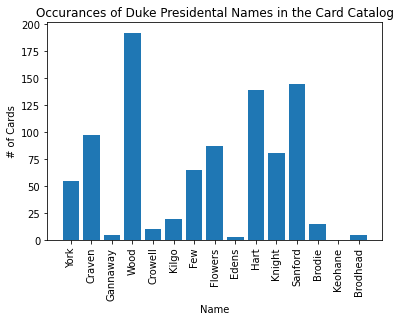

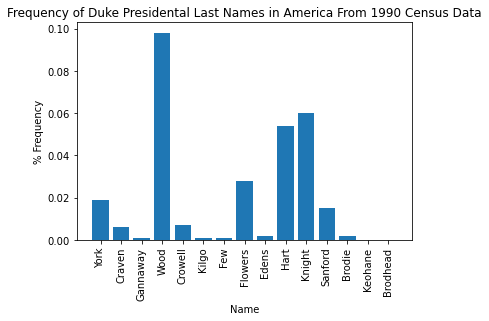

In [13]:
# Disply bar chart of last name occurances
plt.bar(*zip(*president_counts.items()))
plt.xticks(rotation = 90)
plt.title("Occurances of Duke Presidental Names in the Card Catalog")
plt.xlabel("Name")
plt.ylabel("# of Cards")
plt.show()

# Display bar chart of last name frequencies based on the 1990 census data
plt.bar(*zip(*census_freqs.items()))
plt.xticks(rotation = 90)
plt.title("Frequency of Duke Presidental Last Names in America From 1990 Census Data")
plt.xlabel("Name")
plt.ylabel("% Frequency")
plt.show()

The first bar chart shows the frequencies of the Duke presidential last names within the card catalog, in order of presidental appointment. There does not appear to be any trend over time amongst the names. When comparing to the 1990 census data of last name frequency in the United States, some names are similarly more frequent than others (e.g., Wood and Hart) or similarly infrequent (e.g. Gannaway, Edens, and Keohane). Some presidents, however, have statistically uncommon last names but a large amount of occurances in the card catalog (Craven, Few, Sanford). Are there other factors at play?

#### Occurances versus Time in Office

Each of these Presidents served varied time spans in office, let's see if there is a relationship between the length of time they spent in office and the amount of times they were mentioned in cards in the catalog. Preseident Craven served two nonconsecutive terms, so his time in office will be the addition of the two terms.

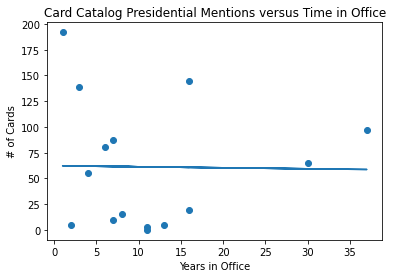

In [29]:
terms = [4, 37, 2, 1, 7, 16, 30, 7, 11, 3, 6, 16, 8, 11, 13]
counts = [55, 97, 5, 192, 10, 19, 65, 87, 3, 139, 81, 145, 15, 0, 5]

# Code adapted from https://www.w3schools.com/python/python_ml_linear_regression.asp
slope, intercept, r, p, std_err = stats.linregress(terms, counts)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, terms))
#------------------------------------------------------------------------

plt.scatter(terms, counts)
plt.plot(terms, mymodel)
plt.title("Card Catalog Presidential Mentions versus Time in Office")
plt.xlabel("Years in Office")
plt.ylabel("# of Cards")
plt.show()

Shown above is a scatterplot of the number of cards on which a presidential last name is mentioned versus the amount of time they spent in office. We ran a linear regression on the data and found **no correlation** between these two variables. Time in office appears not to impact the prevalence of presidential last names in the catalog. What else is going on here?